In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import MinMaxScaler

In [14]:
df = pd.read_csv('adult.data', sep=", ", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", \
              "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary-range"]
def column_cleansing(var):
    return var.replace("?","None")
def column_int_cleansing(var1):
    if(var1=='?'):
        var1=0
    return var1    
df['age'] = df['age'].apply(column_int_cleansing)
df['education-num'] = df['education-num'].apply(column_int_cleansing)
df['fnlwgt'] = df['fnlwgt'].apply(column_int_cleansing)
df['capital-gain'] = df['capital-gain'].apply(column_int_cleansing)
df['capital-loss'] = df['capital-loss'].apply(column_int_cleansing)
df['hours-per-week'] = df['hours-per-week'].apply(column_int_cleansing)
df['salary-range'] = df['salary-range'].apply(column_int_cleansing)

df['workclass'] = df['workclass'].apply(column_cleansing)
df['education'] = df['education'].apply(column_cleansing)
df['marital-status'] = df['marital-status'].apply(column_cleansing)
df['occupation'] = df['occupation'].apply(column_cleansing)
df['relationship'] = df['occupation'].apply(column_cleansing)
df['race'] = df['race'].apply(column_cleansing)
df['sex'] = df['sex'].apply(column_cleansing)
df['native-country'] = df['native-country'].apply(column_cleansing)
below_50K = df[df["salary-range"] == "<=50K"].sample(n=7841)
above_50K = df[df["salary-range"] == ">50K"]

df = pd.concat([above_50K, below_50K])
df['class'] = (df["salary-range"] == ">50K")*1

<ipython-input-14-e7fac127819f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('adult.data', sep=", ", header=None)


In [3]:
def plot_scatter_plot(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10,10))
    fig.subplots_adjust(hspace=.5)
    
    x = below_50K[column1]
    y = below_50K[column2]
    axes[0, 0].scatter(x,y)
    axes[0, 0].set_title("<=50K")
    axes[0, 0].set_xlabel(column1)
    axes[0, 0].set_ylabel(column2)
    
    x = above_50K[column1]
    y = above_50K[column2]
    axes[0, 1].scatter(x,y)
    axes[0, 1].set_title(">50K")
    axes[0, 1].set_xlabel(column1)
    axes[0, 1].set_ylabel(column2)
    
    x = below_50K[column2]
    y = below_50K[column3]
    axes[1, 0].scatter(x,y)
    axes[1, 0].set_title("<=50K")
    axes[1, 0].set_xlabel(column2)
    axes[1, 0].set_ylabel(column3)
    
    x = above_50K[column2]
    y = above_50K[column3]
    axes[1, 1].scatter(x,y)
    axes[1, 1].set_title(">50K")
    axes[1, 1].set_xlabel(column2)
    axes[1, 1].set_ylabel(column3)
    
    x = below_50K[column3]
    y = below_50K[column1]
    axes[2, 0].scatter(x,y)
    axes[2, 0].set_title("<=50K")
    axes[2, 0].set_xlabel(column3)
    axes[2, 0].set_ylabel(column1)
    
    x = above_50K[column3]
    y = above_50K[column1]
    axes[2, 1].scatter(x,y)
    axes[2, 1].set_title(">50K")
    axes[2, 1].set_xlabel(column3)
    axes[2, 1].set_ylabel(column1)
    
    plt.show()

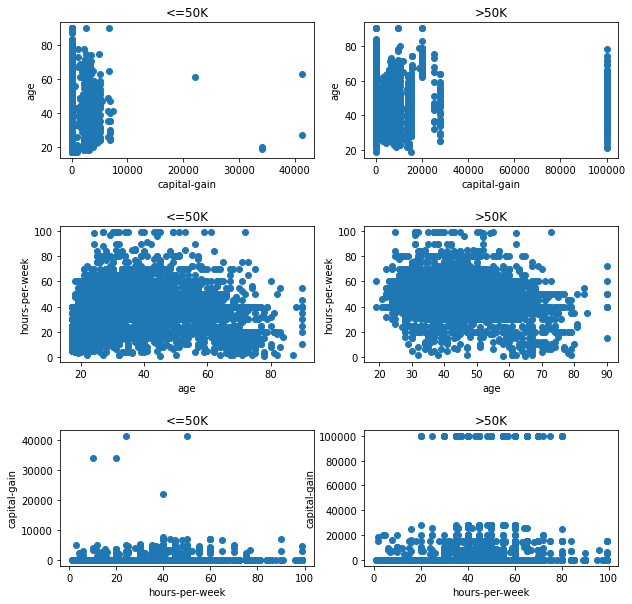

In [4]:
plot_scatter_plot('capital-gain', 'age', 'hours-per-week')

In [97]:
def plot_scatter_plot_diff(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(10,30))
    fig.subplots_adjust(hspace=.5)
    
    colors = df['class']
    x = df[column1]
    y = df[column2]

    axes[0].scatter(x,y,c=colors)
    axes[0].set_title("Scatterplot displaying %s and %s "%(column1.upper(),column2.upper()),fontsize=25)
    fig.suptitle("Purple <=50k \n Yellow >50k ",x=0.8,y=0.852, fontsize=15)
    axes[0].set_xlabel(column1,fontsize=18)
    axes[0].set_ylabel(column2,fontsize=18)
    
    x = df[column2]
    y = df[column3]
    axes[1].scatter(x,y,c=colors)
    axes[1].set_title("Scatterplot displaying %s and %s "%(column2.upper(),column3.upper()),fontsize=25)
    axes[1].set_xlabel(column2,fontsize=18)
    axes[1].set_ylabel(column3,fontsize=18)
    
    
    x = df[column3]
    y = df[column1]
    axes[2].scatter(x,y,c=colors)
    axes[2].set_title("Scatterplot displaying %s and %s "%(column3.upper(),column1.upper()),fontsize=25)
    axes[2].set_xlabel(column3,fontsize=18)
    axes[2].set_ylabel(column1,fontsize=18)
    
    
    plt.show()
    

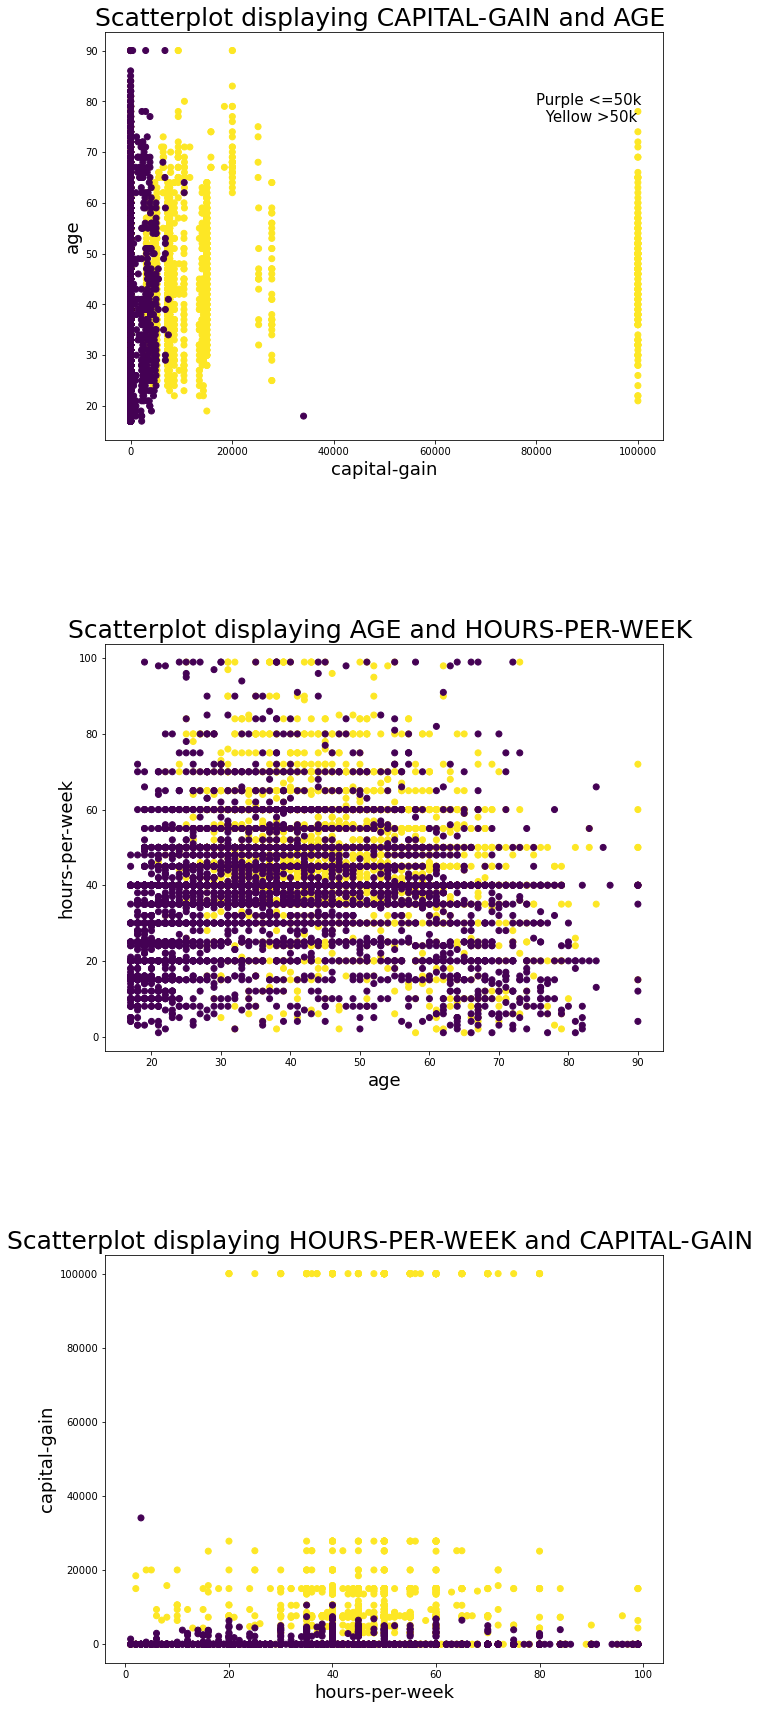

In [98]:
plot_scatter_plot_diff('capital-gain', 'age', 'hours-per-week')

In [6]:
def plot_scatter_matrix_below50K(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,11))
    fig.subplots_adjust(hspace=.5)
    df_below_sm = below_50K[[column1, column2, column3]]
    pd.plotting.scatter_matrix(df_below_sm, ax=axes)
    plt.suptitle("ScatterMatrix displaying %s, %s and %s for Salary <=50k"%(column1.upper(),column2.upper(),column3.upper()),fontsize=25)
    plt.show()

<ipython-input-6-5bdd73c45cd3>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df_below_sm, ax=axes)


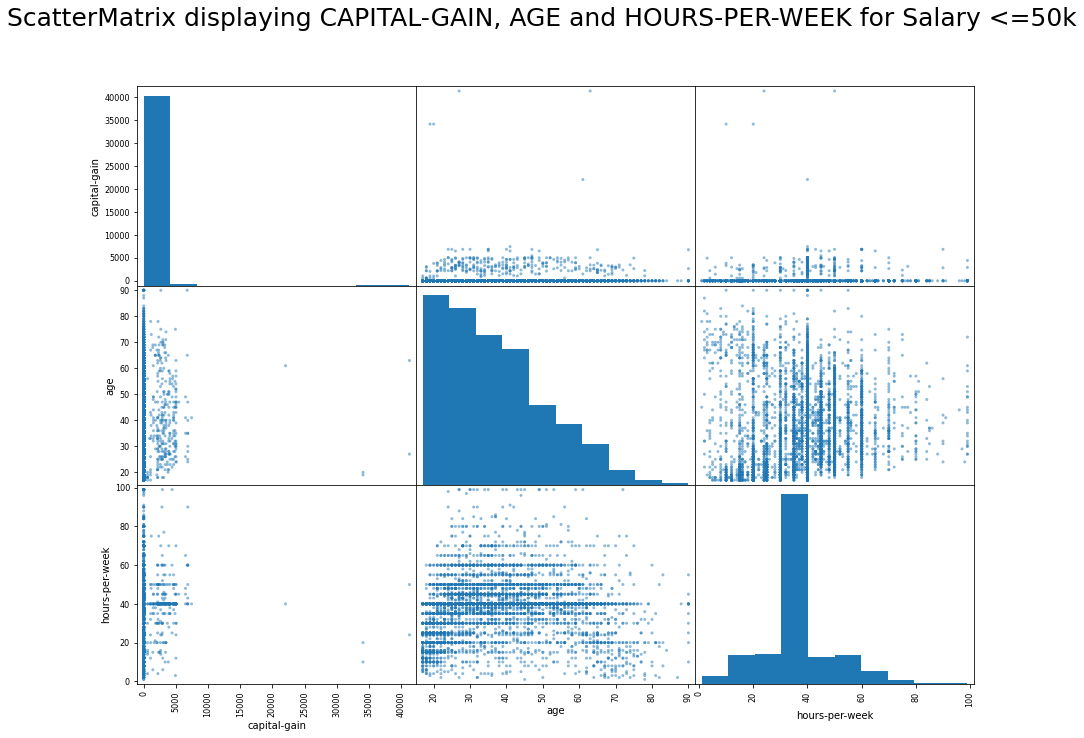

In [7]:
plot_scatter_matrix_below50K('capital-gain', 'age', 'hours-per-week')

In [8]:
def plot_scatter_matrix_above50K(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,11))
    fig.subplots_adjust(hspace=.5)
    df_above_sm = above_50K[[column1, column2, column3]]
    pd.plotting.scatter_matrix(df_above_sm, ax=axes)
    plt.suptitle("ScatterMatrix displaying %s, %s and %s for Salary >50k"%(column1.upper(),column2.upper(),column3.upper()),fontsize=25)
    plt.show()

<ipython-input-72-663ffc499ee4>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df_above_sm, ax=axes)


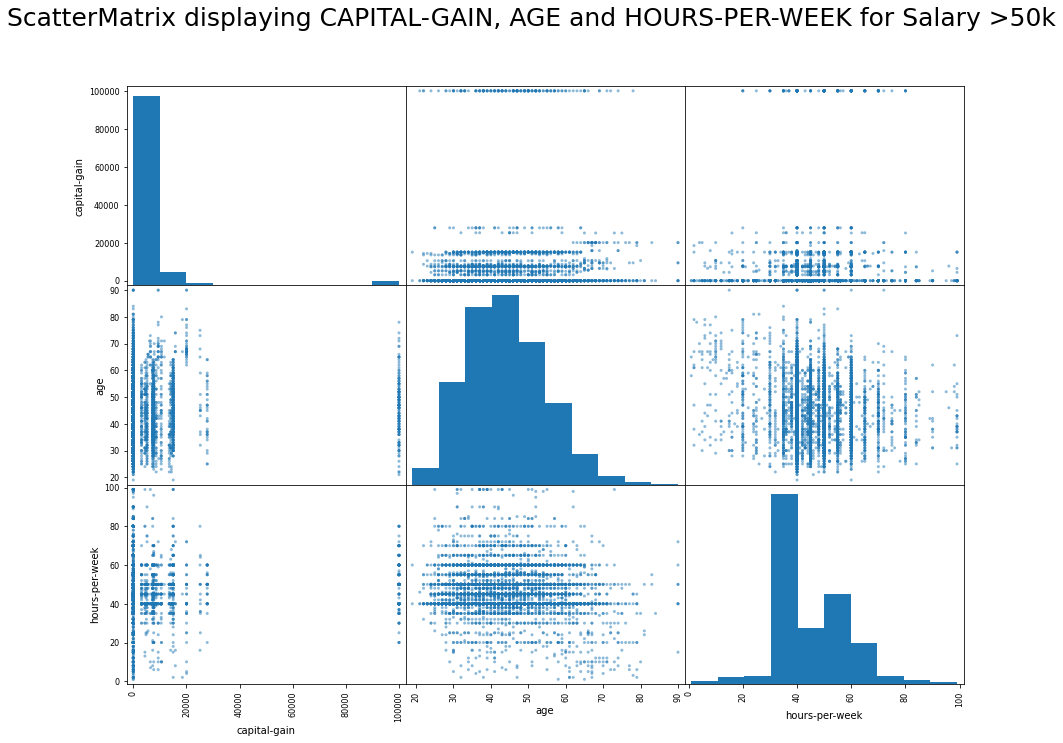

In [73]:
plot_scatter_matrix_above50K('capital-gain', 'age', 'hours-per-week')

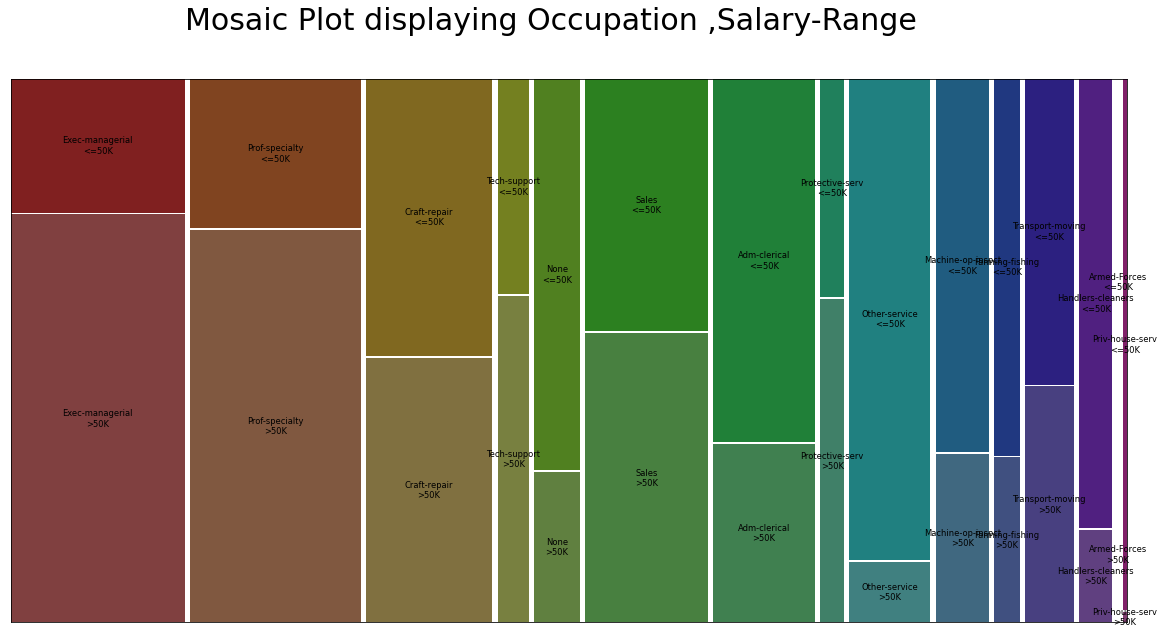

In [12]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(20,10))
fig.subplots_adjust(hspace=.5)
mosaic(df, ['occupation', 'salary-range'], ax=axes, axes_label=False)
plt.suptitle("Mosaic Plot displaying Occupation ,Salary-Range",fontsize=30)
plt.show()

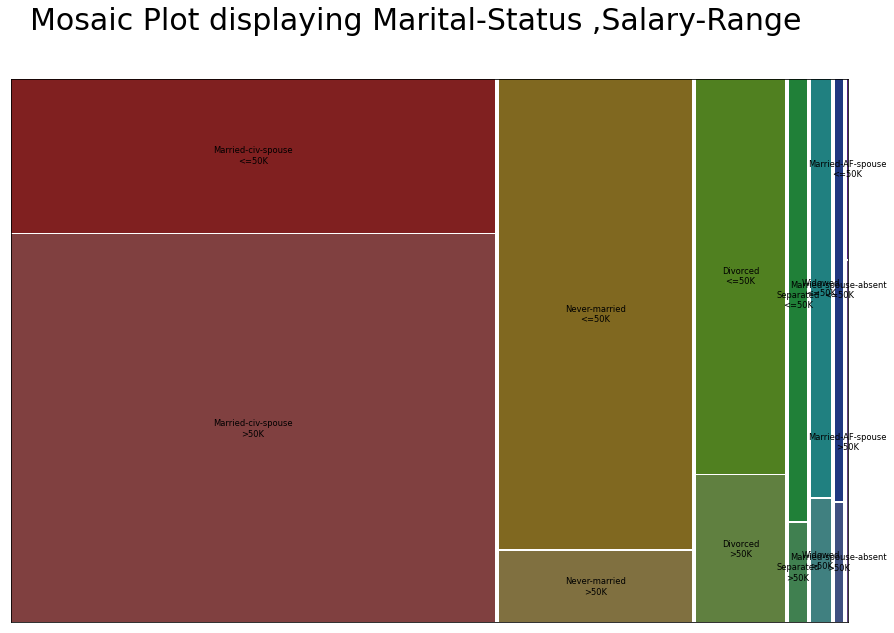

In [13]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
fig.subplots_adjust(hspace=.5)
mosaic(df, ['marital-status', 'salary-range'], ax=axes, axes_label=False)
plt.suptitle("Mosaic Plot displaying Marital-Status ,Salary-Range",fontsize=30)
plt.show()

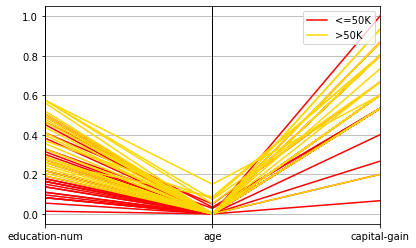

In [13]:
frame_pc = df[['education-num', 'age', 'capital-gain', 'class']].copy()
frame_np_array = MinMaxScaler().fit_transform(frame_pc.values)
frame_pc = pd.DataFrame(frame_np_array)
df.index = frame_pc.index
frame_pc['salary-range'] = df['salary-range']
frame_pc.columns = ['capital-gain', 'education-num', 'age', 'class', 'salary-range']
frame_pc_below_50K = frame_pc[frame_pc["class"] == 0.0].sample(n=30)
frame_pc_above_50K = frame_pc[frame_pc["class"] == 1.0].sample(n=30)
frame_pc = pd.concat([frame_pc_below_50K, frame_pc_above_50K])
pd.plotting.parallel_coordinates(frame_pc, 'salary-range', cols=['education-num', 'age', 'capital-gain'], color=('#FF0000',
                         '#FFD700'))
plt.show()

In [16]:
def plot_mosaic_class(column1, column2, column3):
    plt.close()
    cols = [column1, column2, column3]
    for i in range(3):
        for j in range(i+1, 3):
            print("Salary <=50K")
            mosaic(below_50K, [cols[i], cols[j]])
            plt.rcParams["figure.figsize"]=(20,10)
            plt.show()
            print("Salary >50K")
            mosaic(above_50K, [cols[i], cols[j]])
            plt.rcParams["figure.figsize"]=(20,10)
            plt.show()
    for i in range(3):
        print("Salary <=50K")
        mosaic(below_50K, [cols[i]])
        plt.rcParams["figure.figsize"]=(20,10)
        plt.show()
        print("Salary >50K")
        mosaic(above_50K, [cols[i]])
        plt.rcParams["figure.figsize"]=(20,10)
        plt.show()
    for i in range(3):
        mosaic(df, [cols[i], 'salary-range'])
        plt.rcParams["figure.figsize"]=(20,10)
        plt.show()
        

Salary <=50K


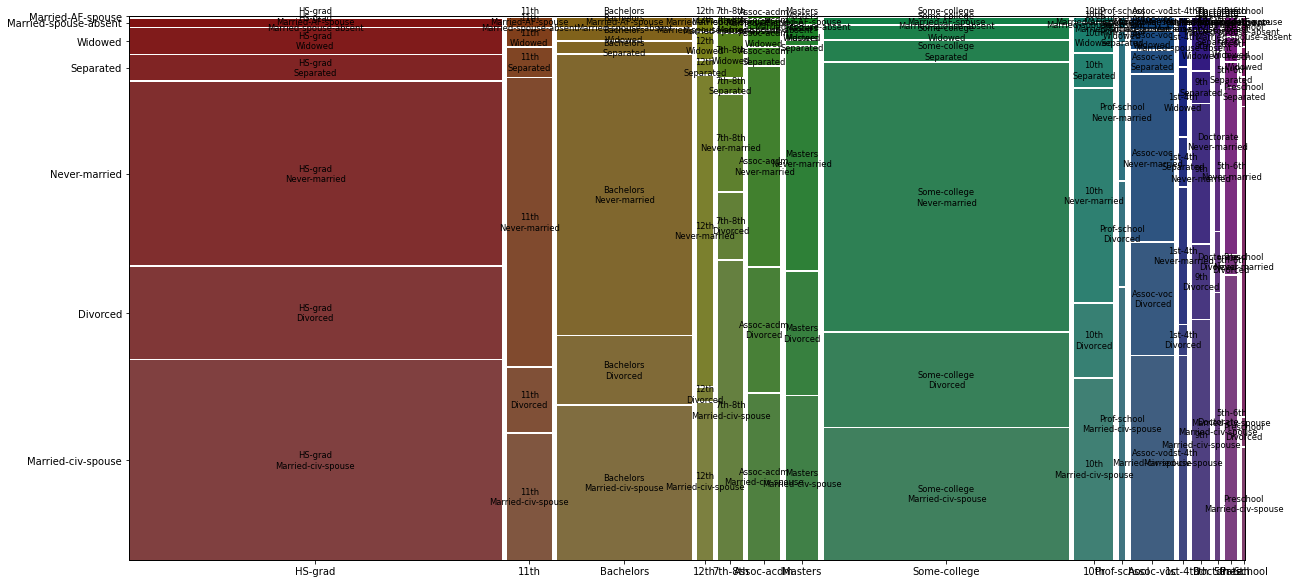

Salary >50K


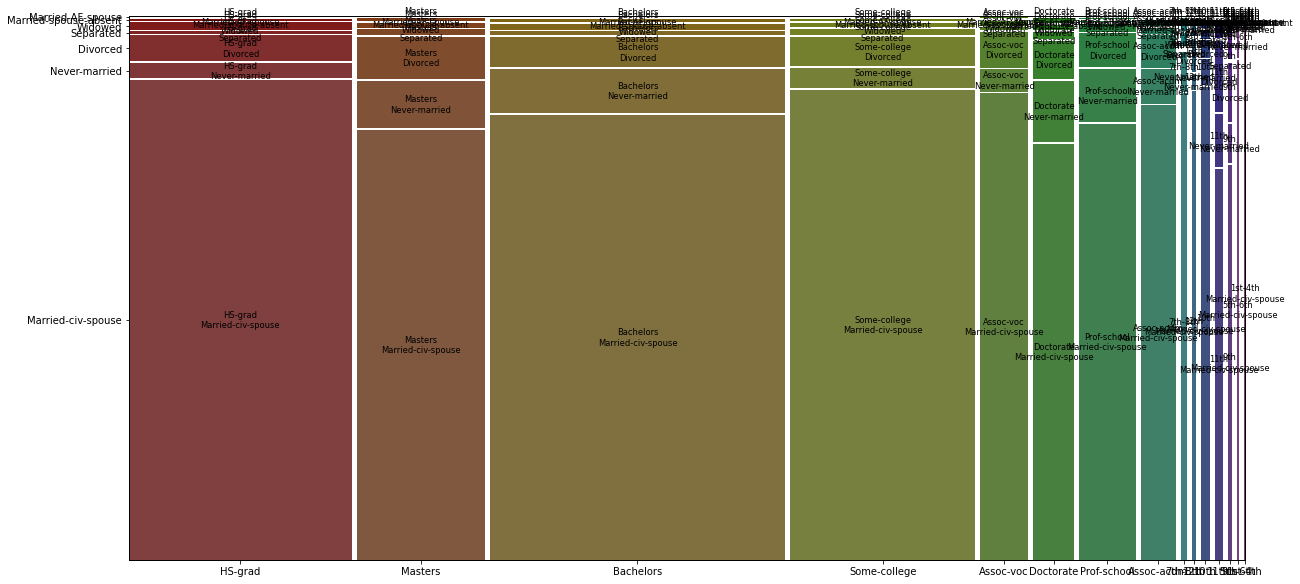

Salary <=50K


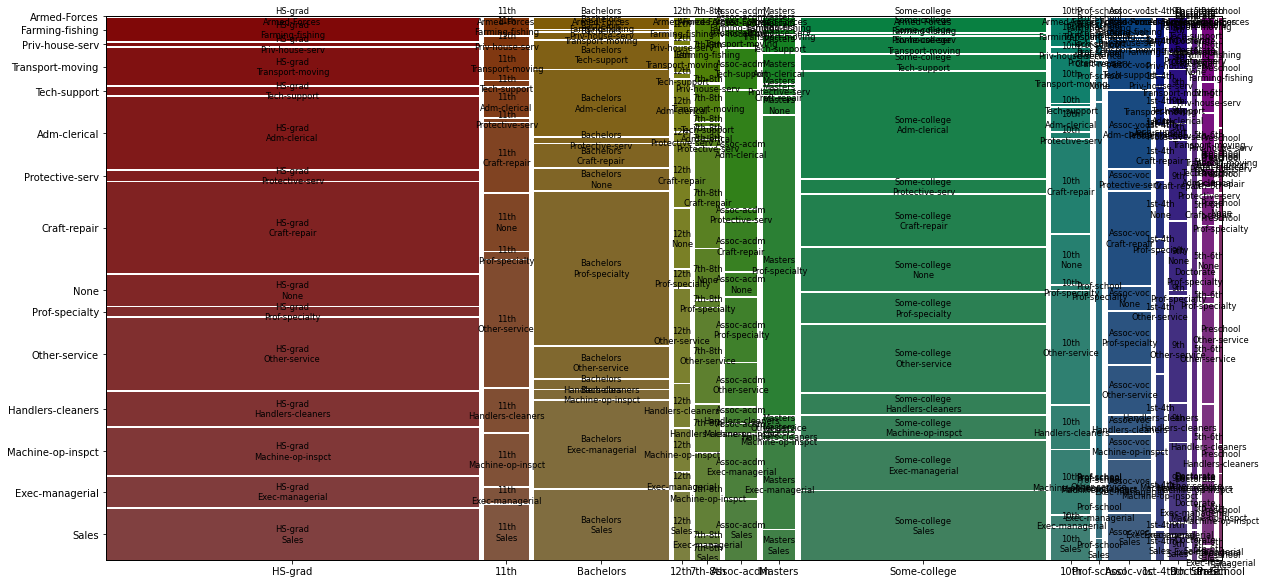

Salary >50K


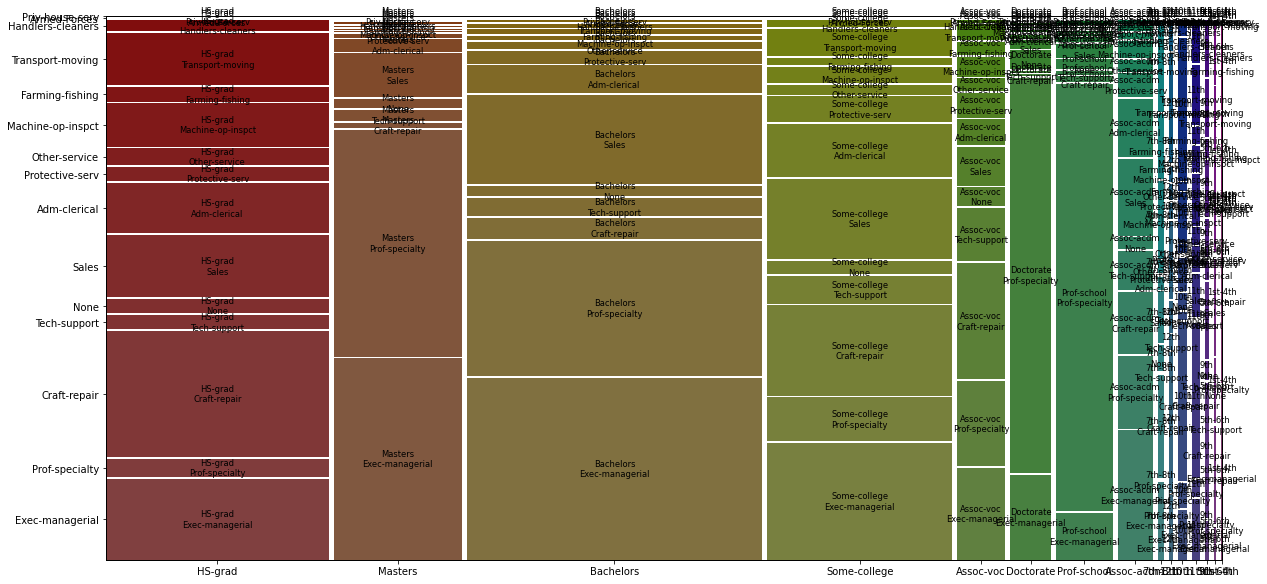

Salary <=50K


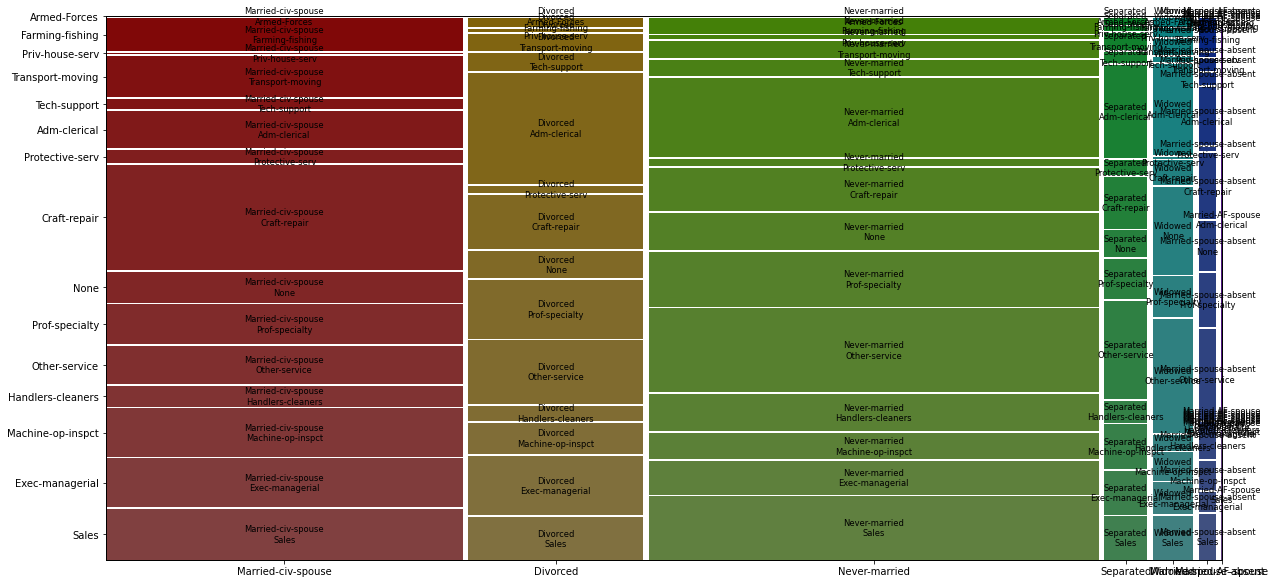

Salary >50K


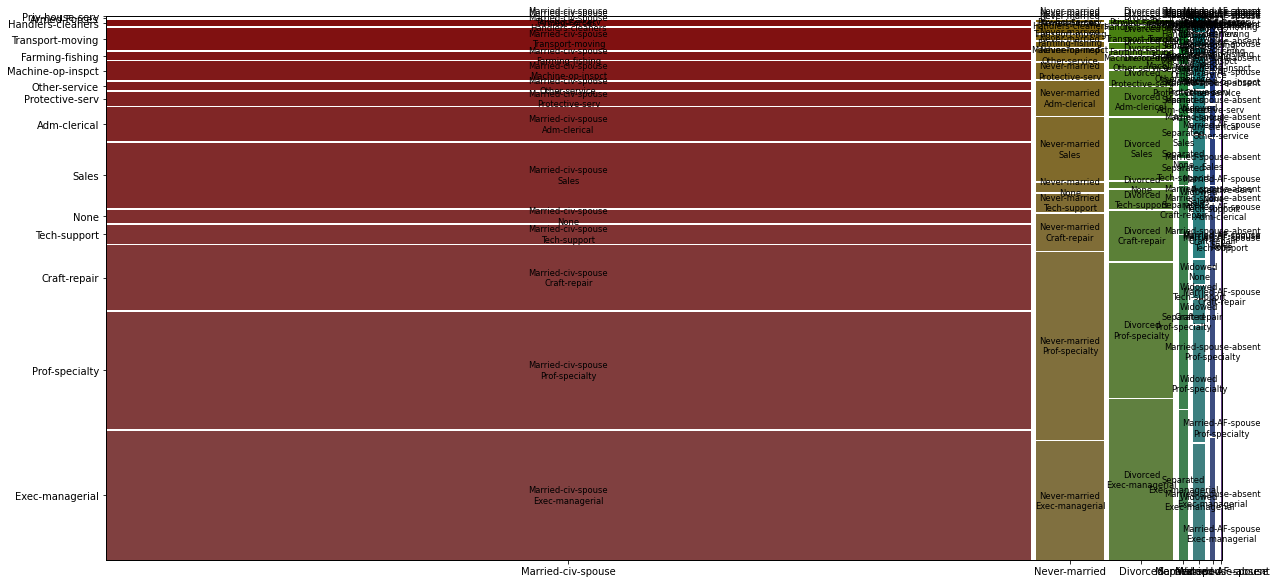

Salary <=50K


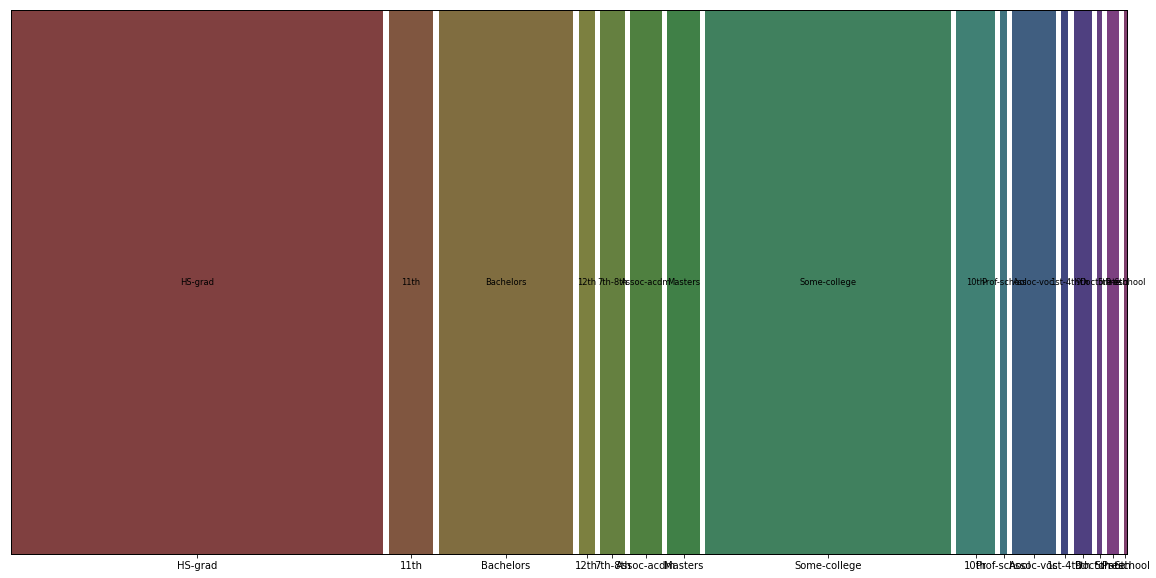

Salary >50K


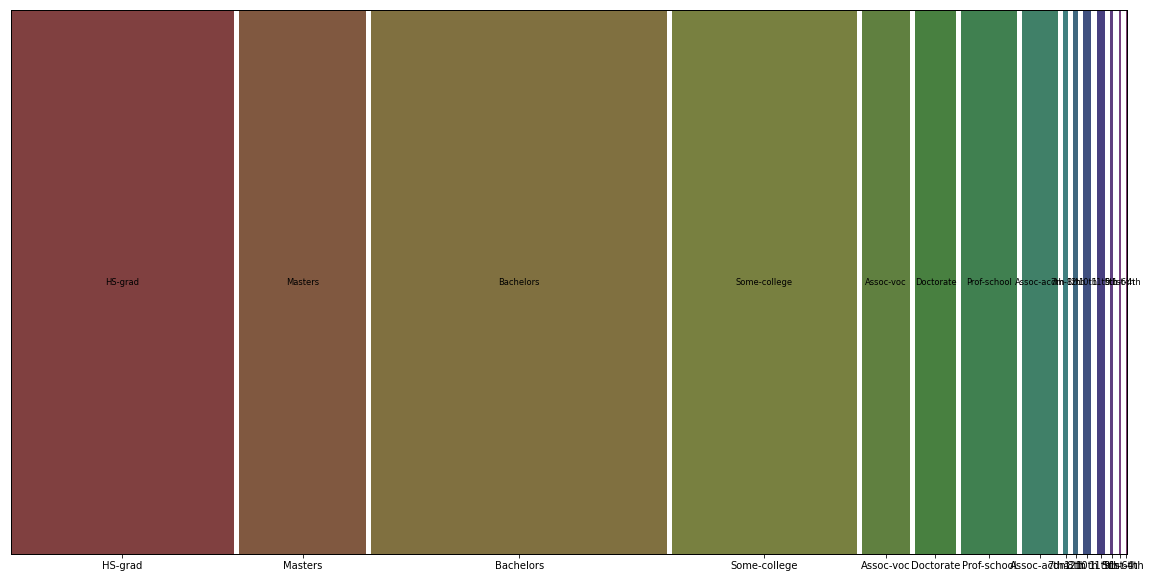

Salary <=50K


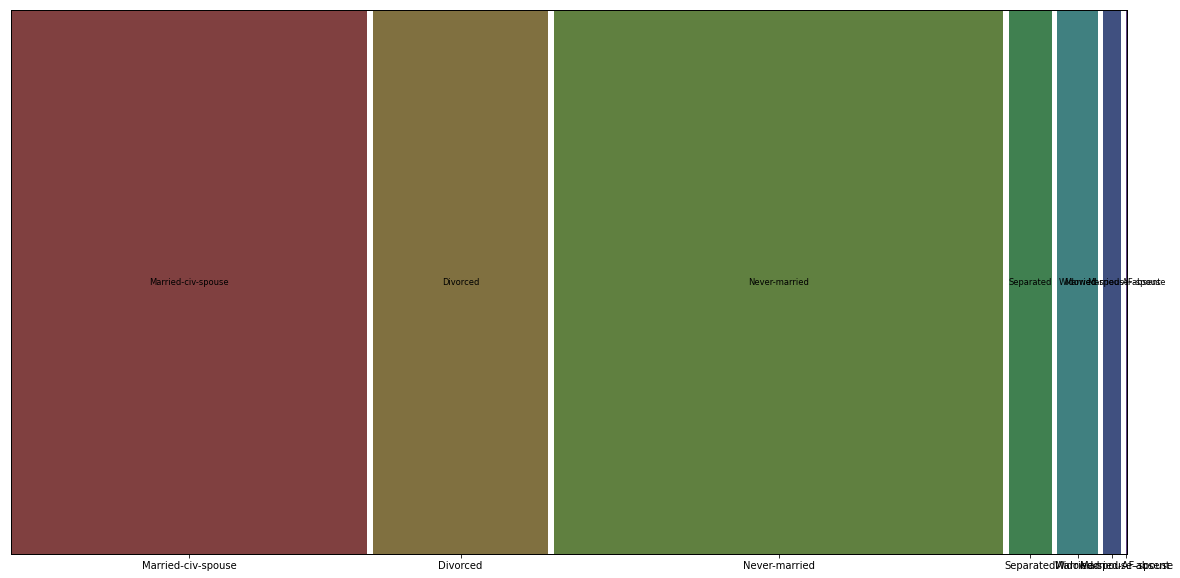

Salary >50K


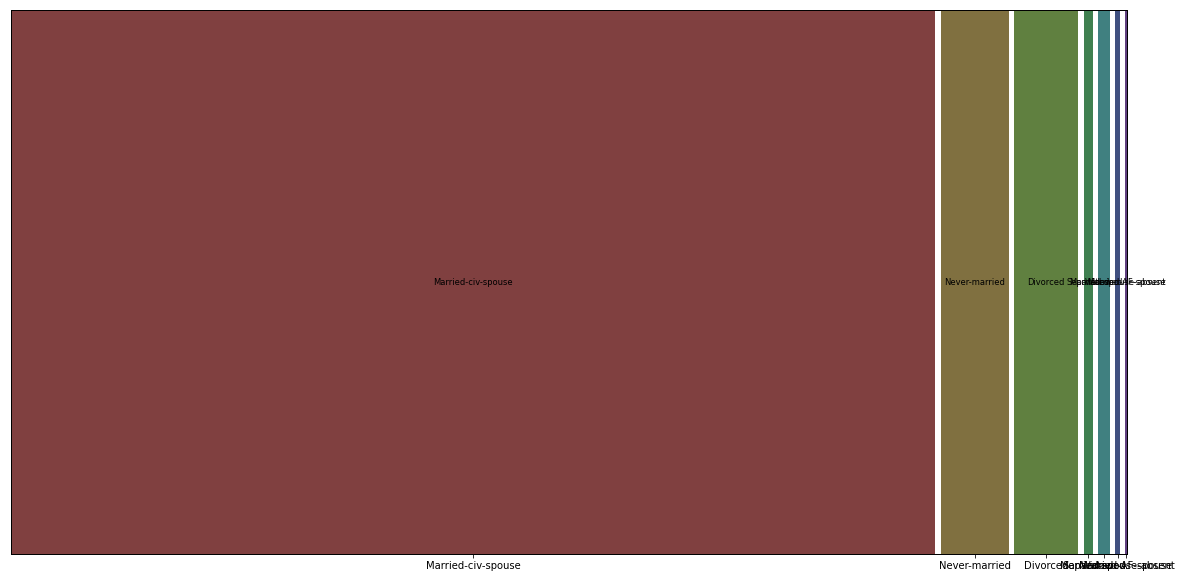

Salary <=50K


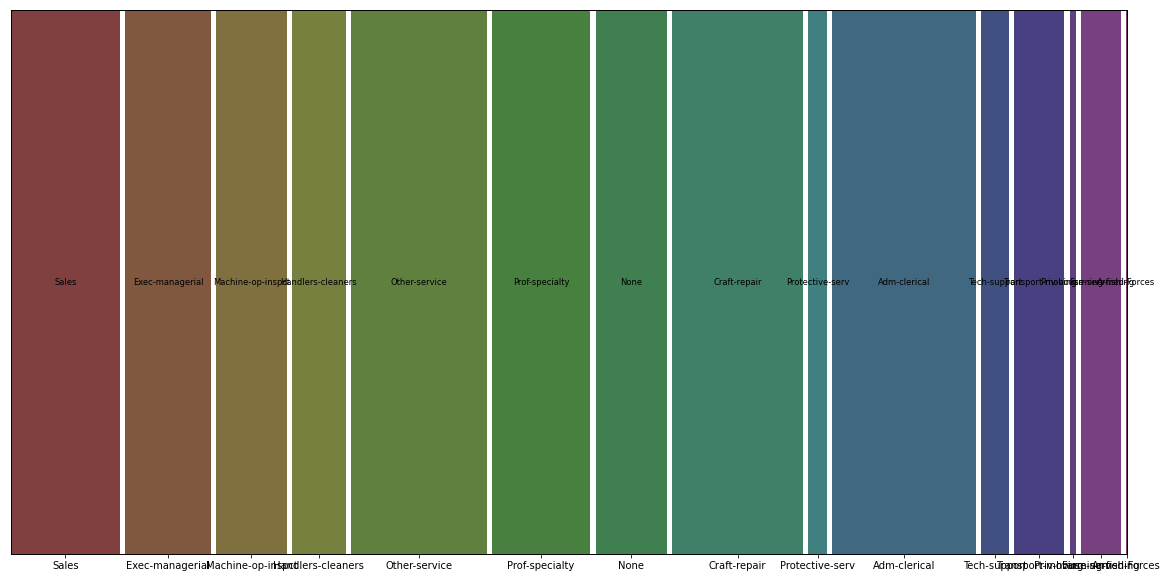

Salary >50K


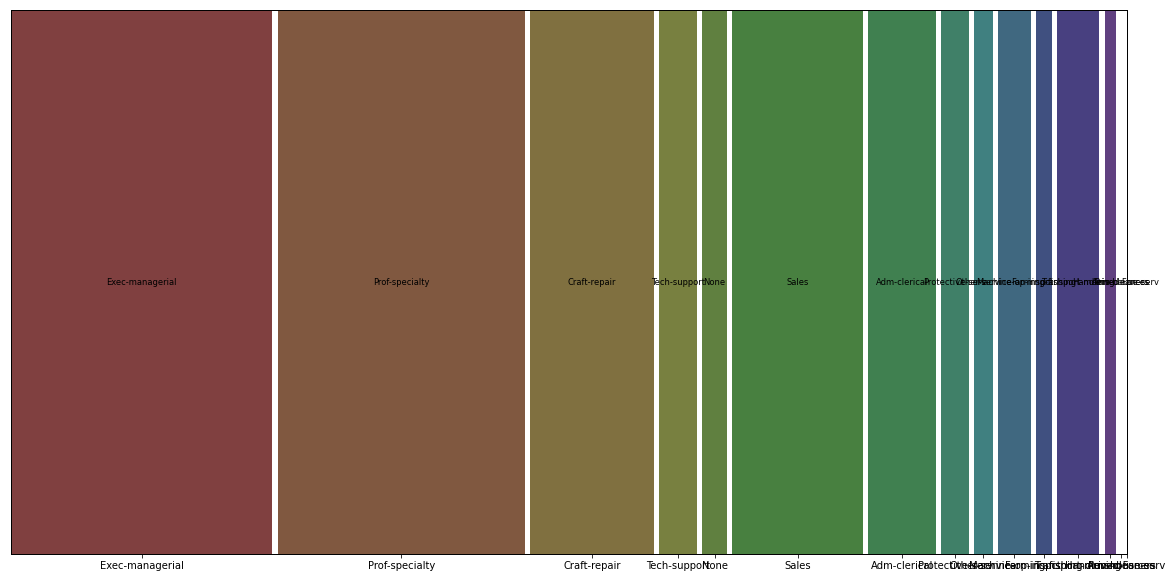

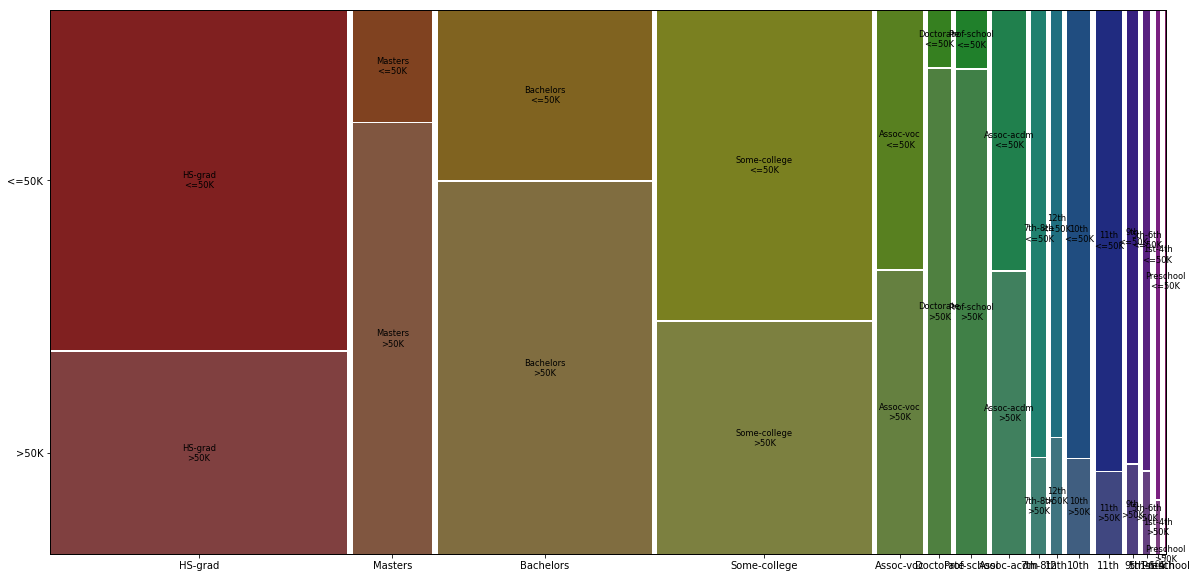

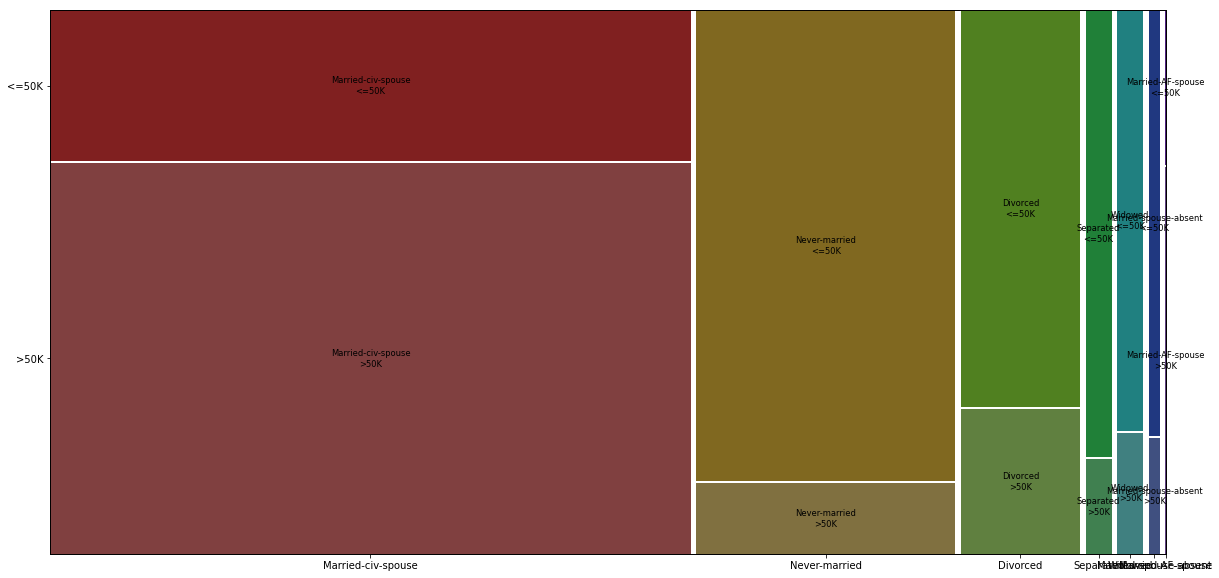

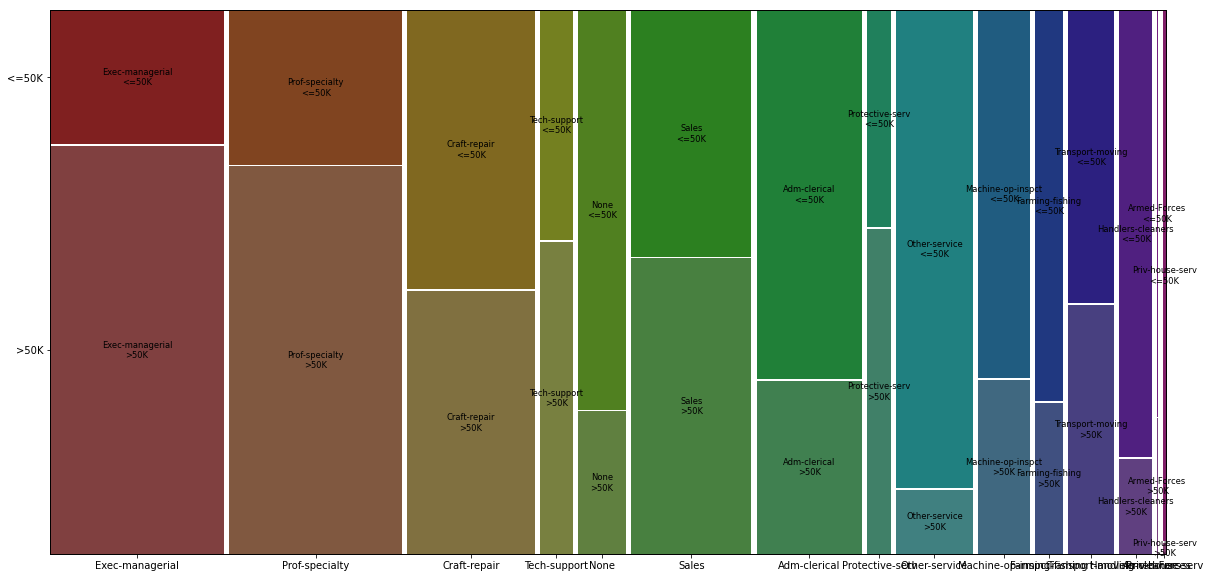

In [17]:
plot_mosaic_class('education', 'marital-status', 'occupation')